<a href="https://colab.research.google.com/github/Farhanmohamedkn/tensorflow_basics/blob/master/Tensorflow_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TensorFlow Basics
# Core Learning Algorithms

In [ ]:
!pip install -q sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## 1.Linear Regression using Tatanic dataset

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [ ]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(y_train)

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64


In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = [] #to convert  text to certain numbers from CATEGORICAL_COLUMNS(words) we cant use names or letters inside the arrays
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

# Input function used for inputing data for train and test (this will vary on depending on data and the process ) we have to write ourself

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label #labels means the y_train(survived)
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

# Building the model

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier  (here what is actually happens the linear regression)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [ ]:
#traing and testing
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.7613636


## 2.Classifications using Flower Data set

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf

import pandas as pd

In [ ]:
# we have 3 types of flowers and each floer has 5 features
# using the feature we predict the flower
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# Lets define some constants to help us later on

In [ ]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

In [ ]:
train.head()
# you can see below the flowers name is already encoded with numbers under species coloumn(1,2,0) previously we did it ourself

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
#for y set we use the column for prediction(what to predict? in our case which flower it is?  earlier it was survived or not?)
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() # the species column is now gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [ ]:
train.shape  # we have 120 entires with 4 features (120,4)
train_y.head()

0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64

# Input function used for inputing data for train and test (this will vary on depending on data and the process ) we have to write ourself

In [ ]:
def input_fn(features, labels, training=True, batch_size=256): # see no epochs
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels)) #labels means the y_train(species)

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)


## Feature column

In [ ]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys(): #looping through all columns
    my_feature_columns.append(tf.feature_column.numeric_column(key=key)) #they already encoded so need of unique which conver the name to number
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


# Building the model
we have to types of built in classifiers for tensorflow
DNN and Linear classifier

In [ ]:
# we use Deep neural network classifier
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each. ( model name is classifier using estimator important )

classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3) # 3 flowers

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


# train

In [ ]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)
# We include a lambda to avoid creating an inner function previously
# using lambda we can create a function inside another function basically lambda is a function
#steps and epochs are different
# epochs means how many times we repeatedly give the same data to the network(dont confuse it with episodes)
#steps means instead of looking at the whole data 10 tiems we look at 5000 flowers individual datas??

Instructions for updating:
Use tf.keras instead.


# Evaluate Test

In [ ]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.933



# Now do the prediction
we enter some random values of the feature of the flower and our model will predict which flower it is

In [ ]:
21def input_fn(features, batch_size=256): # see no labels were given y_train becuase we going to predict it
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid:
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))



  # here we calcluate the probability for 3 flowers and show the highest probability flower as prediction


Please type numeric values as prompted.
SepalLength: 2.4
SepalWidth: .4
PetalLength: .4
PetalWidth: 2.4


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


Prediction is "Virginica" (62.4%)


## 3. Clustering (normally used for unsupervised learning)

# 4.Hidden Markov Models (use probability distribution data)

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
!pip install tensorflow_probability


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time


ValueError: Arg specs do not match: original=FullArgSpec(args=['x', 'y', 'name'], varargs=None, varkw=None, defaults=(None,), kwonlyargs=[], kwonlydefaults=None, annotations={'return': typing.Annotated[_any, <class 'tensorflow.security.fuzzing.py.annotation_types.Bool'>], 'x': typing.Annotated[_any, ~TV_Greater_T], 'y': typing.Annotated[_any, ~TV_Greater_T]}), static=FullArgSpec(args=['x', 'y', 'name'], varargs=None, varkw=None, defaults=(None,), kwonlyargs=[], kwonlydefaults=None, annotations={}), fn=<function greater at 0x7caa944f20e0>

# Weather Model

In [ ]:
tfd = tfp.distributions  # making a shortcut for later on
initial_distribution = tfd.Categorical(probs=[0.2, 0.8])  # Refer to point 2 above
transition_distribution = tfd.Categorical(probs=[[0.5, 0.5],
                                                 [0.2, 0.8]])  # refer to points 3 and 4 above
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # refer to point 5 above

# the loc argument represents the mean and the scale is the standard devitation

NameError: name 'tfp' is not defined

In [ ]:
mean = model.mean()

# due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# from within a session to see the value of this tensor

# in the new version of tensorflow we need to use tf.compat.v1.Session() rather than just tf.Session()
with tf.compat.v1.Session() as sess:
  print(mean.numpy())

# My first neural Network

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Datasets

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [ ]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Lets look at how the images look

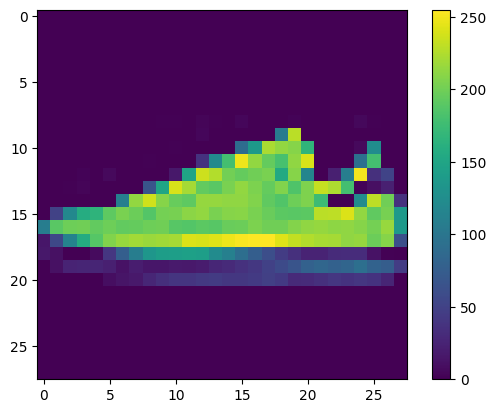

In [ ]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

# Data preprocessing

In [ ]:
train_images = train_images / 255.0 # Our pixel values are between 0 and 255 make sure both test and train in same format

test_images = test_images / 255.0  #because our weights are between 0 and 1 so we amke the train and test data to between 0 and 1

# Lets build our model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

# Lets compile the model ??
in order for adding optimizer and loss function and metrics to evaluate

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #accuracy of the data training thought by the model(overfitting) itslef its different!!!


#to get the model actual accuracy we do the testing

# Lets train the model now

In [ ]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 19s 8ms/step - loss: 0.5018 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3795 - accuracy: 0.8621
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3400 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3148 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2978 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2806 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2709 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2579 - accuracy: 0.9022
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2480 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.24

# Lets evaluate the model by testing it using test data

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) # verbose means s we printing  details on the console nothing to do with the model

print('Test accuracy:', test_acc) #test_loss, test_acc because we know the function return 2 values as a tuple(x,y) in python we can access it like this

313/313 [==============================] - 1s 3ms/step - loss: 0.3325 - accuracy: 0.8818
Test accuracy: 0.8817999958992004


# Lets make predictions by only passing data without labels

In [ ]:
predictions = model.predict(test_images) #This method returns to us an array of predictions for each image we passed it.

313/313 [==============================] - 1s 3ms/step


Let's have a look at the predictions for image 6.we already know its boots

Ankle boot


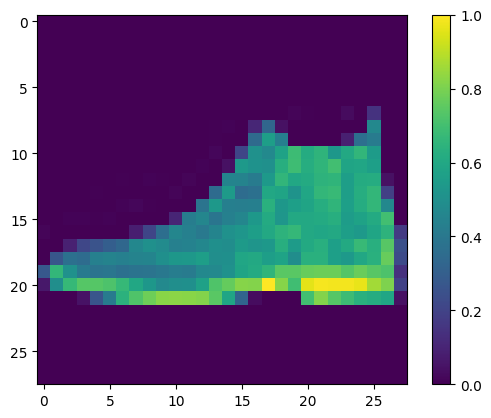

In [ ]:
print(class_names[np.argmax(predictions[6])]) #get the prediction for 6th image and print the class

plt.figure()
plt.imshow(test_images[6])#plot the 6th image
plt.colorbar()
plt.grid(False)
plt.show()

# Lets make predictions for any  images we want

Pick a number: 5
1/1 [==============================] - 0s 22ms/step


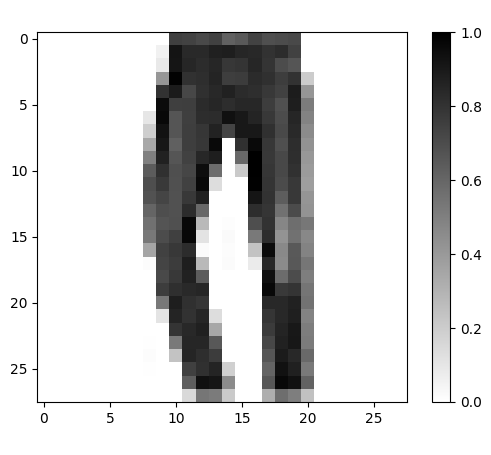

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


# Deep Computer vision

# Lets createmy first convolutional neural Network

# Dataset CIFAR image Dataset
It contains 60,000 32x32 color images with 6000 images of each class.

The labels in this dataset are the following:

Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck

In [2]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt



#  LOAD AND SPLIT DATASET from keras built in datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() #not numpy actual images

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0 #because the weughts are betwwen 0 and 1

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
170498071/170498071 [==============================] - 2s 0us/step


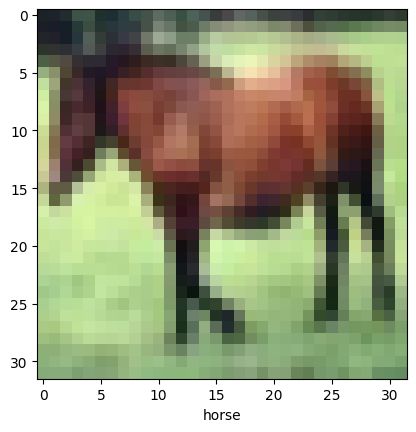

In [3]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

# Lets build our CNN architecture

In [4]:
# Base of convolution

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # 32 is number of filters not neurons
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary()  # let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

(None, 30, 30, 32)  30x30 because we dont add padding otherwise we got the actual input size which is 32x32 of the image

and notice the values are reducing every layer going down depth of our image increase but dimension matrix reduce
we started from 32x32 now we are in 4x4

# now we need to pass this to dense layer remeber cnn uses dense layer

In [7]:
# So far, we have just completed the convolutional base.
# Now we need to take these extracted features and add a way to classify them.
# This is why we add the following layers to our model.

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) #64 is  neurons not no of filters
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0